## EDA

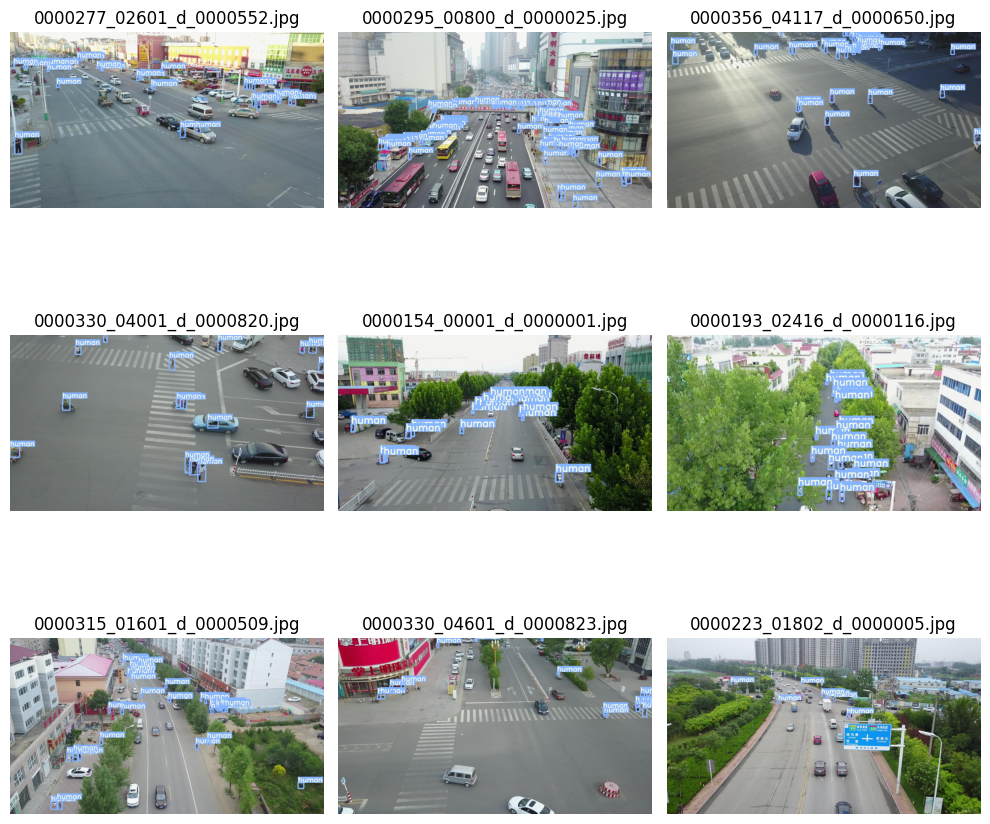

In [9]:
from src.visualization.draw_annotation import show_random_images
from pathlib import Path
import sys

sys.path.append('../')
root_folder = Path("../datasets/VisDrone/VisDrone2019-DET-val/")


show_random_images(root_folder, ['human'], (3, 3))

In [1]:
import ultralytics
import comet_ml

ultralytics.checks()
comet_ml.init(project_name="human-detection")

/home/danya-sakharov/drone-human-detection/.venv/lib/python3.8/site-packages/torch/cuda/__init__.py:141: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Ultralytics YOLOv8.0.238 🚀 Python-3.8.10 torch-2.2.2+cu121 CPU (Intel Core(TM) i9-10900X 3.70GHz)
Setup complete ✅ (20 CPUs, 62.5 GB RAM, 856.4/914.3 GB disk)


In [2]:
from ultralytics import YOLO

In [3]:
model = YOLO("yolov8n.pt")
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [4]:
# add_wandb_callback(model, enable_model_checkpointing=True)

results = model.train(project='human-detection', data='../datasets/cfg/VisDrone.yaml', epochs=5, imgsz=640, single_cls=True, save_period=1, save_json=True)

# wandb.finish()

New https://pypi.org/project/ultralytics/8.1.41 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.238 🚀 Python-3.8.10 torch-2.2.2+cu121 CPU (Intel Core(TM) i9-10900X 3.70GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../datasets/cfg/VisDrone.yaml, epochs=5, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=human-detection, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/danya-pixel/human-detection/a6ba68ff2bd24565b35fcade340b72be



Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /home/danya-sakharov/drone-human-detection/datasets/VisDrone/VisDrone2019-DET-train/labels.cache... 5684 images, 787 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/danya-sakharov/drone-human-detection/datasets/VisDrone/VisDrone2019-DET-train/images/0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /home/danya-sakharov/drone-human-detection/datasets/VisDrone/VisDrone2019-DET-train/images/9999987_00000_d_0000049.jpg: 1 duplicate labels removed



val: Scanning /home/danya-sakharov/drone-human-detection/datasets/VisDrone/VisDrone2019-DET-val/labels.cache... 531 images, 17 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]


Plotting labels to human-detection/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      2.761      2.357      1.061        106        640: 100%|██████████| 405/405 [17:13<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:24<00:00,  1.37s/it]


                   all        548      13969      0.378      0.269      0.233     0.0759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      2.692      1.818      1.026        168        640: 100%|██████████| 405/405 [17:13<00:00,  2.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:24<00:00,  1.37s/it]

                   all        548      13969      0.387      0.274      0.246     0.0788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      2.612      1.722      1.021         71        640: 100%|██████████| 405/405 [17:22<00:00,  2.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:24<00:00,  1.36s/it]

                   all        548      13969      0.434      0.314      0.294      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      2.552      1.634     0.9989        175        640: 100%|██████████| 405/405 [17:24<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:24<00:00,  1.38s/it]

                   all        548      13969      0.475      0.329      0.327      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      2.519      1.586      0.988        108        640: 100%|██████████| 405/405 [17:29<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:24<00:00,  1.38s/it]

                   all        548      13969       0.48      0.345      0.342      0.121



5 epochs completed in 1.482 hours.
Optimizer stripped from human-detection/train/weights/last.pt, 6.2MB
Optimizer stripped from human-detection/train/weights/best.pt, 6.2MB

Validating human-detection/train/weights/best.pt...
Ultralytics YOLOv8.0.238 🚀 Python-3.8.10 torch-2.2.2+cu121 CPU (Intel Core(TM) i9-10900X 3.70GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:22<00:00,  1.26s/it]


                   all        548      13969       0.48      0.345      0.342      0.121
Speed: 0.7ms preprocess, 20.0ms inference, 0.0ms loss, 1.1ms postprocess per image
Saving human-detection/train/predictions.json...
Results saved to human-detection/train


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/danya-pixel/human-detection/a6ba68ff2bd24565b35fcade340b72be
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [6]               : (0.0006650205761316873, 0.0012070057613168725)
COMET INFO:     lr/pg1 [6]               : (0.0006650205761316873, 0.0012070057613168725)
COMET INFO:     lr/pg2 [6]               : (0.0006650205761316873, 0.0012070057613168725)
COMET INFO:     metrics/mAP50(B) [6]     : (0.23316, 0.34178)
COMET INFO:     metrics/mAP50-95(B) [6]  : (0.07591, 0.12106)
COMET INFO:     metrics/precision(B) [6] : (0.37779, 0.4803585035785798)
COMET INFO:     metrics/recall(B) [6]    : (0.26867, 0.34455)
COME

In [10]:
url = "https://www.youtube.com/watch?v=_PLDxp_0yCo"

results = model(url, stream=False, save=True, stream_buffer=True)


1/1: https://www.youtube.com/watch?v=_PLDxp_0yCo... Success ✅ (1667 frames of shape 1920x1080 at 30.00 FPS)


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 384x640 115 peoples, 38.9ms
0: 384x640 112 peoples, 33.0ms
0: 384x640 117 peoples, 29.5ms
0: 384x640 112 peoples, 27.1ms
0: 384x640 109 peoples, 27.0ms
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
0: 384x640 131 peoples, 37.8ms
W

KeyboardInterrupt: 